# Loan eligibility 
is an important part of the financial services industry, defining if an applica
tion applies for a loan based on numerous of factors. Normally, the test is done personally, with
 important documentation, credit history checks, and personal reviews by lenders. Important
 factors for applicants include their income, work position, credit score, before loans, and general
 financial well-being.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('loan-train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Check for data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# Check data missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Start to fill data with missing values

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True) 
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)
df.isna().sum()

C:\Users\sedth\AppData\Local\Temp\ipykernel_13300\4116218195.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
C:\Users\sedth\AppData\Local\Temp\ipykernel_13300\4116218195.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

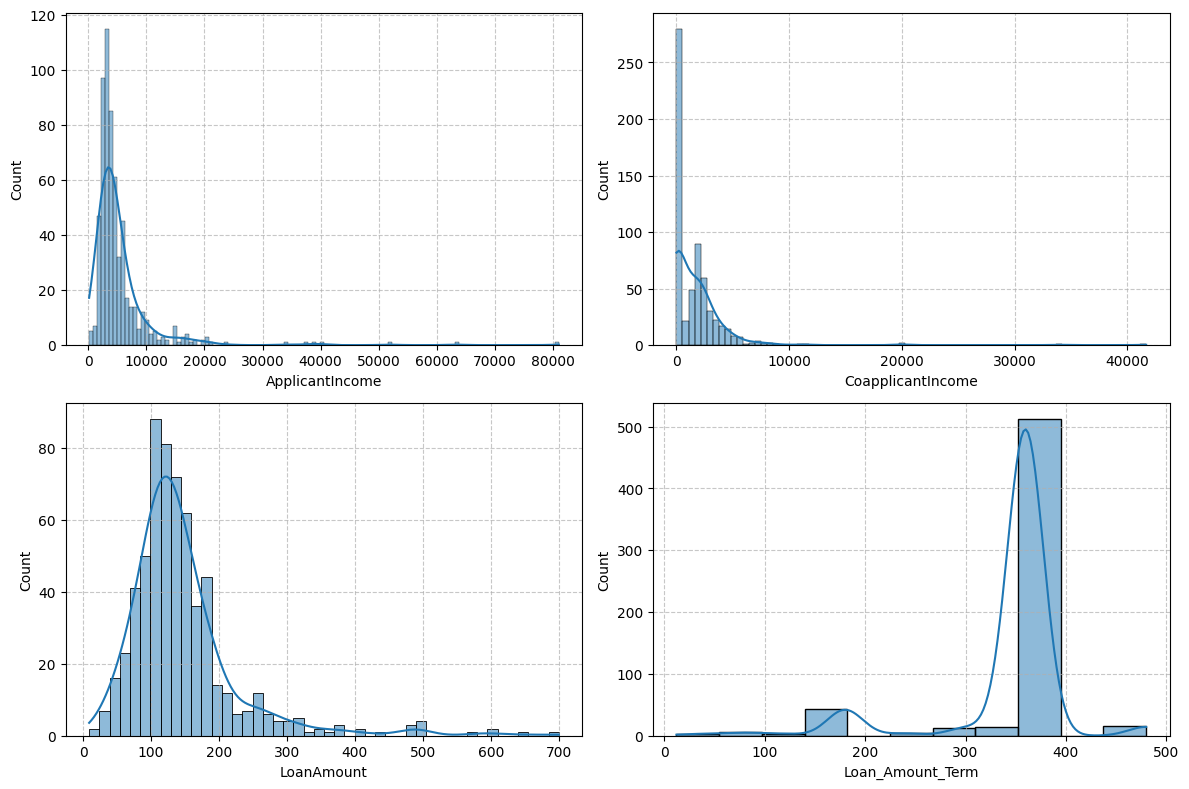

In [7]:
# Data Distribution Before Log transform

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sb.histplot(df['ApplicantIncome'],kde=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.subplot(2,2,2)
sb.histplot(df['CoapplicantIncome'],kde=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.subplot(2,2,3)
sb.histplot(df['LoanAmount'],kde=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.subplot(2,2,4)
sb.histplot(df['Loan_Amount_Term'],kde=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
#  checking the boxplot of the data, we can easily see that the data contains a lot of outliers

fig = make_subplots(rows = 1,cols=4,subplot_titles=df.columns[6:10])
fig.add_trace(go.Box(y=df['ApplicantIncome']),row=1,col=1)
fig.add_trace(go.Box(y=df['CoapplicantIncome']),row=1,col=2)
fig.add_trace(go.Box(y=df['LoanAmount']),row=1,col=3)
fig.add_trace(go.Box(y=df['Loan_Amount_Term']),row=1,col=4)
fig.update_layout(title_text='Box plot with numerical feature',width=1000,height=600)
fig.show()

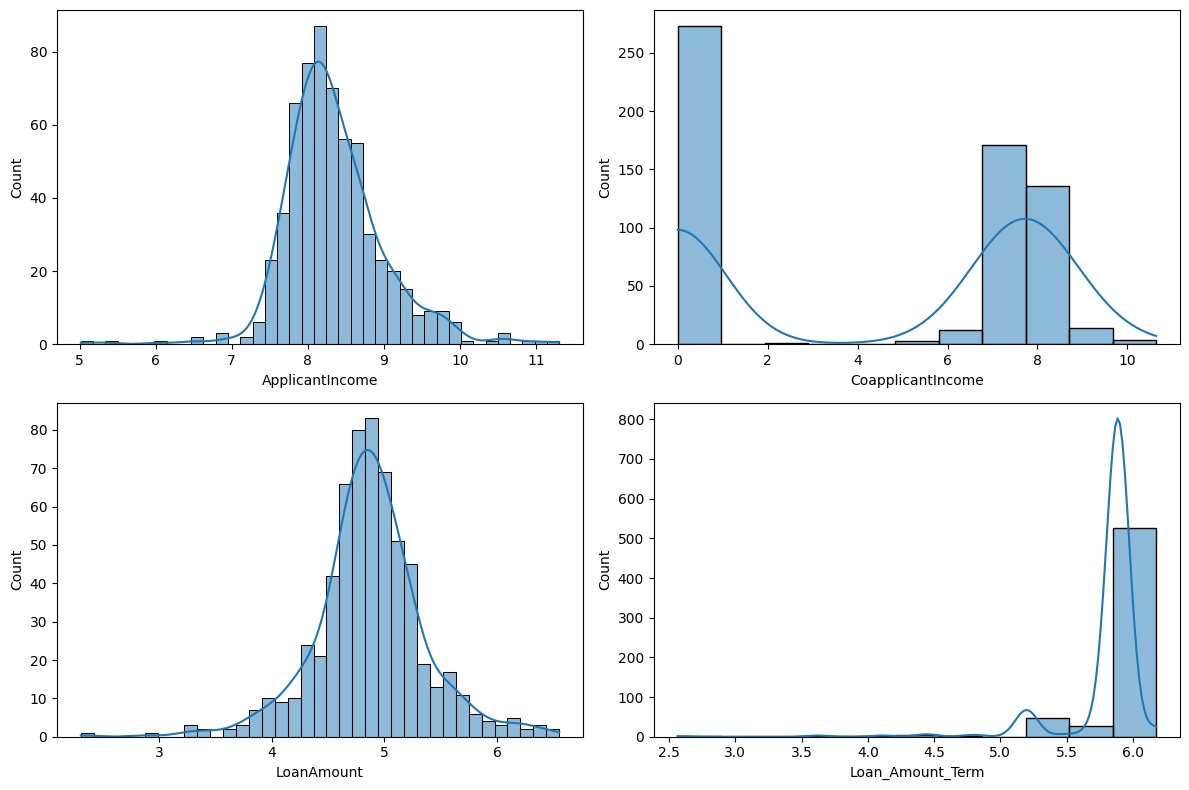

In [9]:
# # Data Distribution After Log transform

df['CoapplicantIncome'] = np.log(df['CoapplicantIncome']+1)
df['ApplicantIncome'] = np.log(df['ApplicantIncome']+1)
df['LoanAmount'] = np.log(df['LoanAmount']+1)
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term']+1)
df['Credit_History'] = np.log(df['Credit_History']+1)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sb.histplot(df['ApplicantIncome'],kde=True)
plt.subplot(2,2,2)
sb.histplot(df['CoapplicantIncome'],kde=True)
plt.subplot(2,2,3)
sb.histplot(df['LoanAmount'],kde=True)
plt.subplot(2,2,4)
sb.histplot(df['Loan_Amount_Term'],kde=True)
plt.tight_layout()
plt.show()

In [10]:
#checking the boxplot of the data after Log transform

fig = make_subplots(rows = 1,cols=4,subplot_titles=df.columns[6:10])
fig.add_trace(go.Box(y=df['ApplicantIncome']),row=1,col=1)
fig.add_trace(go.Box(y=df['CoapplicantIncome']),row=1,col=2)
fig.add_trace(go.Box(y=df['LoanAmount']),row=1,col=3)
fig.add_trace(go.Box(y=df['Loan_Amount_Term']),row=1,col=4)
fig.update_layout(title_text='Box plot with numerical feature',width=1000,height=600)
fig.show()

We make a pairplot of all the numeric variables,\
to visualise which variables are 
most correlated to the target variable'Loan_Status'

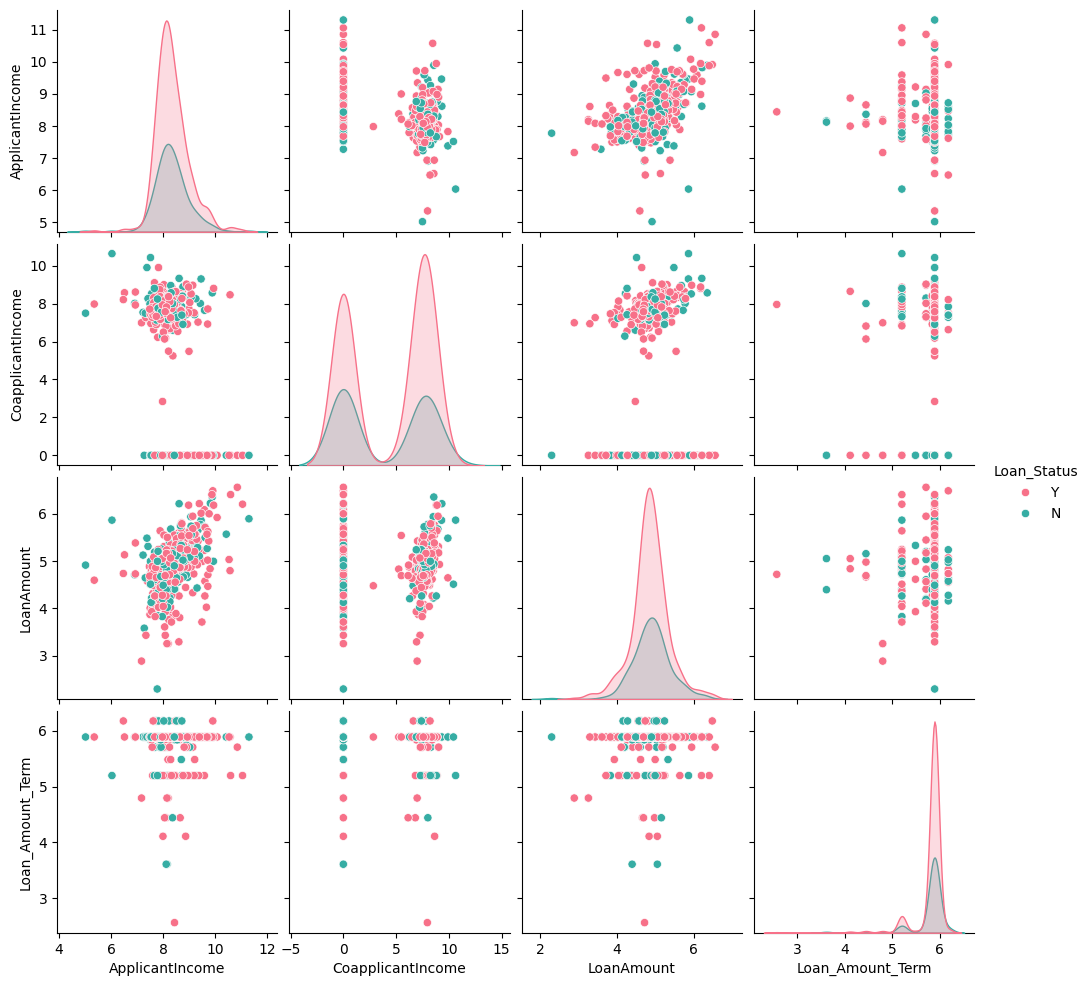

In [11]:
sb.pairplot(df, vars=["ApplicantIncome", 'CoapplicantIncome','LoanAmount','Loan_Amount_Term'],hue='Loan_Status',palette="husl")
plt.show()

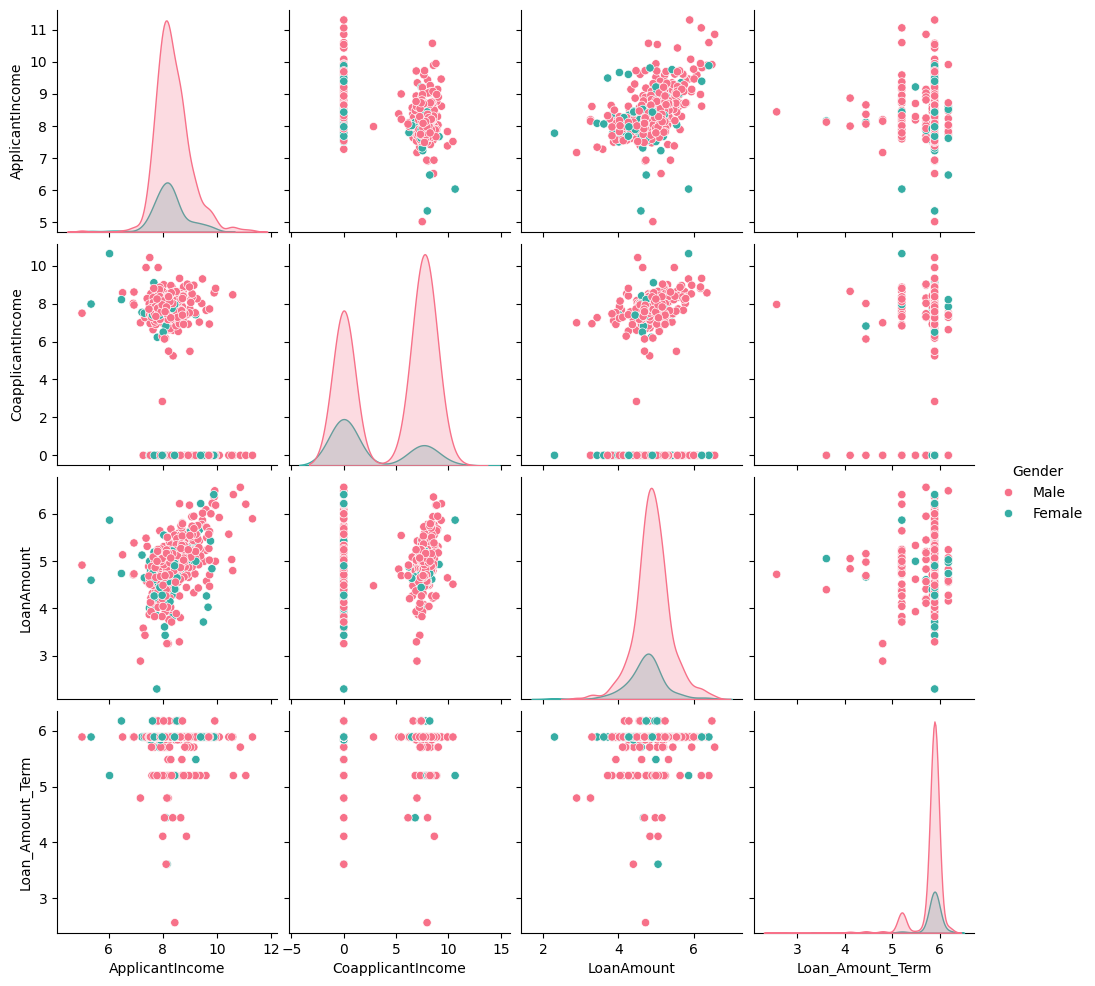

In [12]:
# for this I just want to compare them with a nother variable 
# This pairplot allows us to observe patterns and correlations 
sb.pairplot(df, vars=["ApplicantIncome", 'CoapplicantIncome','LoanAmount','Loan_Amount_Term'],
            hue='Gender',palette="husl")
plt.show()

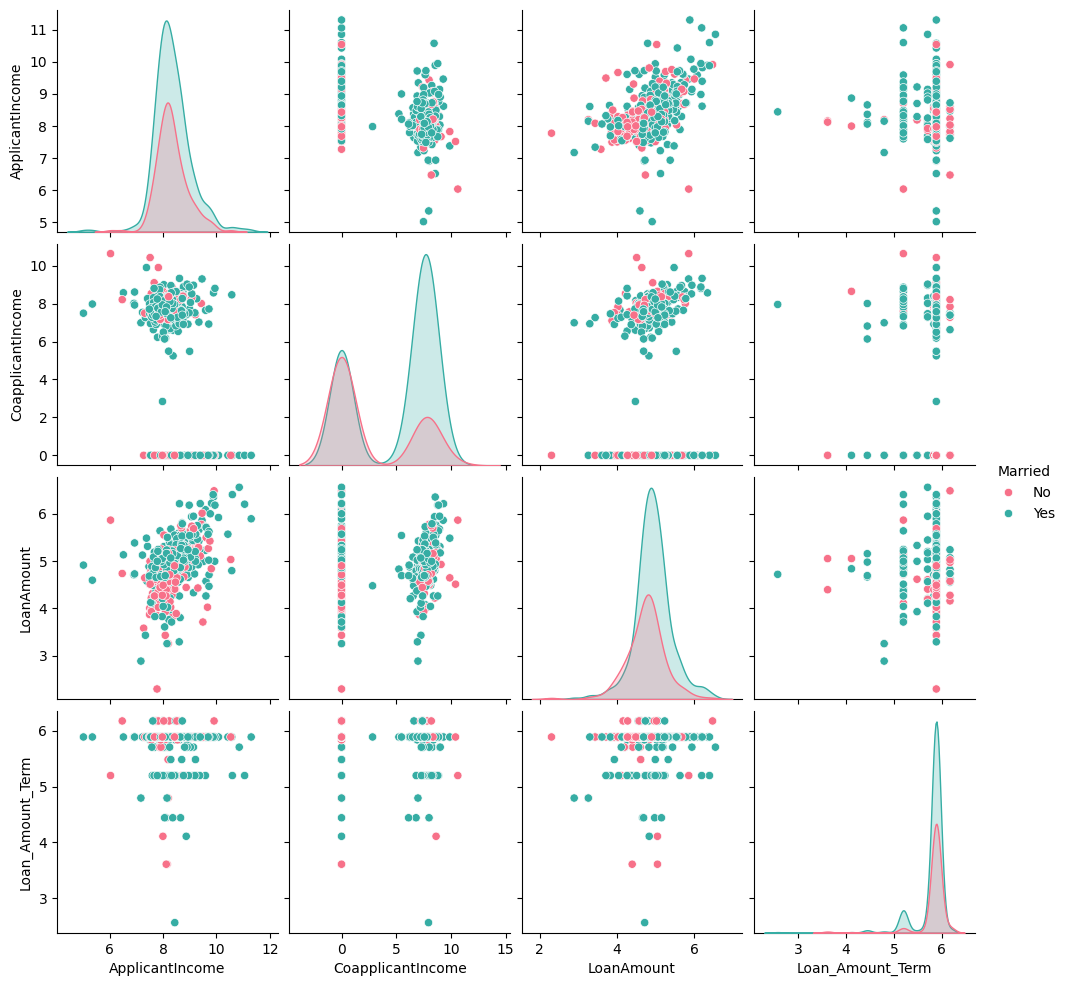

In [13]:
sb.pairplot(df, vars=["ApplicantIncome", 'CoapplicantIncome','LoanAmount','Loan_Amount_Term'],hue='Married',palette="husl")
plt.show()

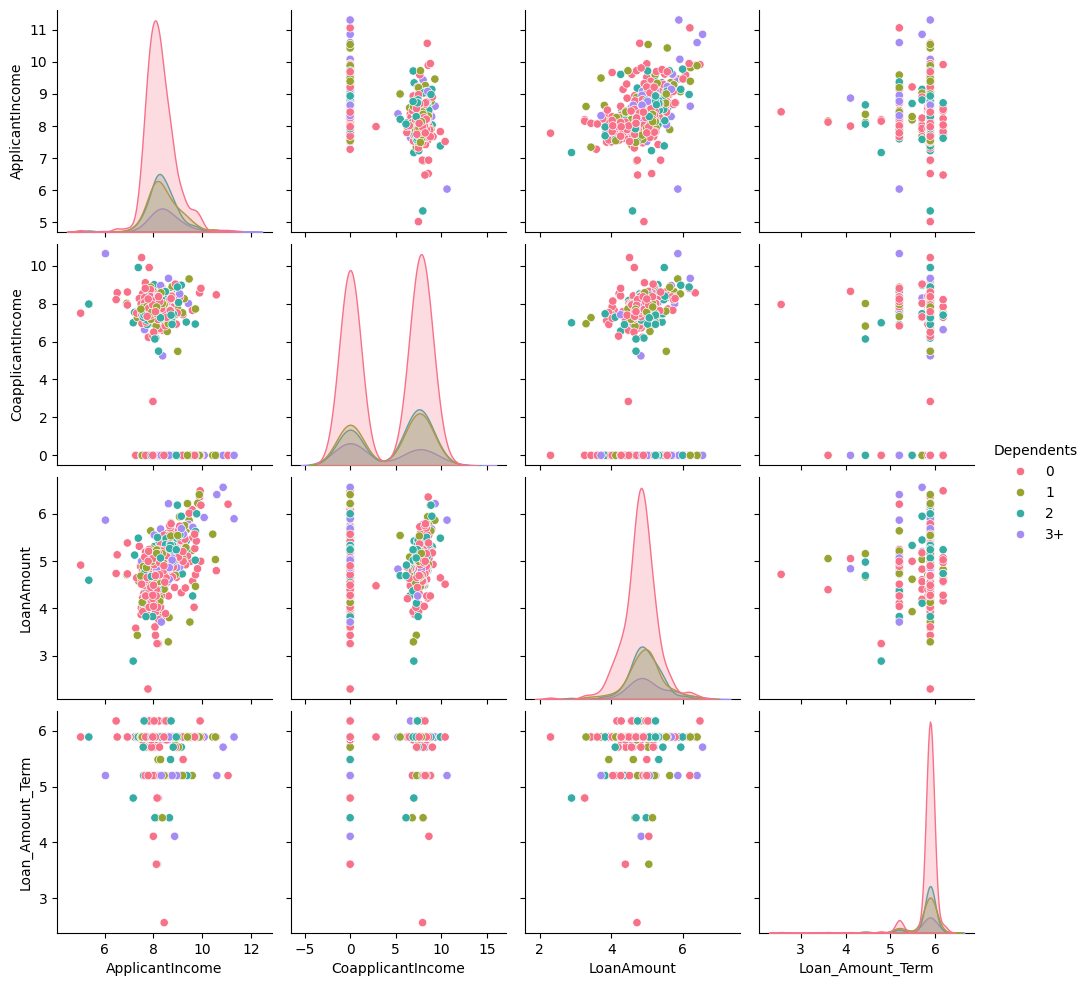

In [14]:
sb.pairplot(df, vars=["ApplicantIncome", 'CoapplicantIncome','LoanAmount','Loan_Amount_Term'],hue='Dependents',palette="husl")
plt.show()

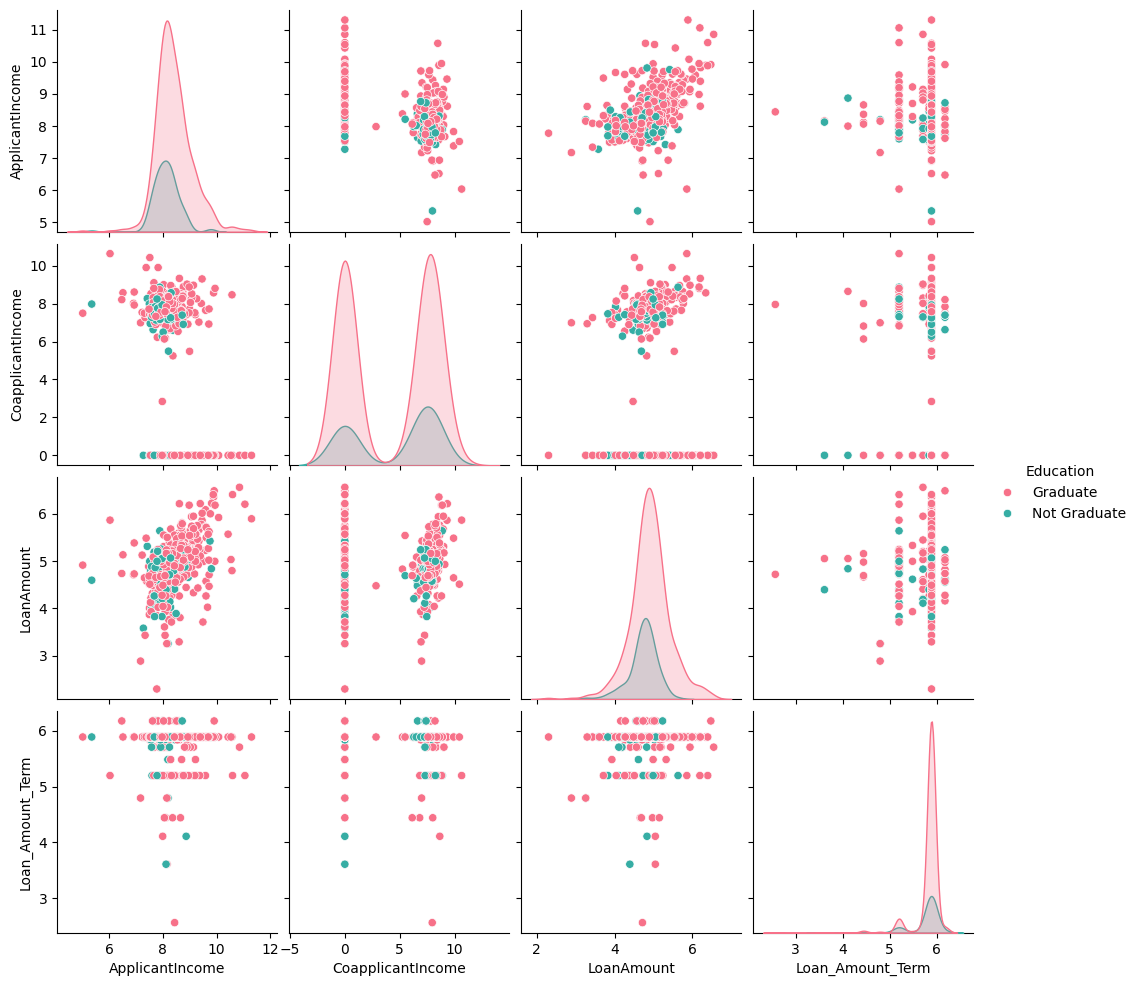

In [15]:
sb.pairplot(df, vars=["ApplicantIncome", 'CoapplicantIncome','LoanAmount','Loan_Amount_Term'],hue='Education',palette="husl")
plt.show()

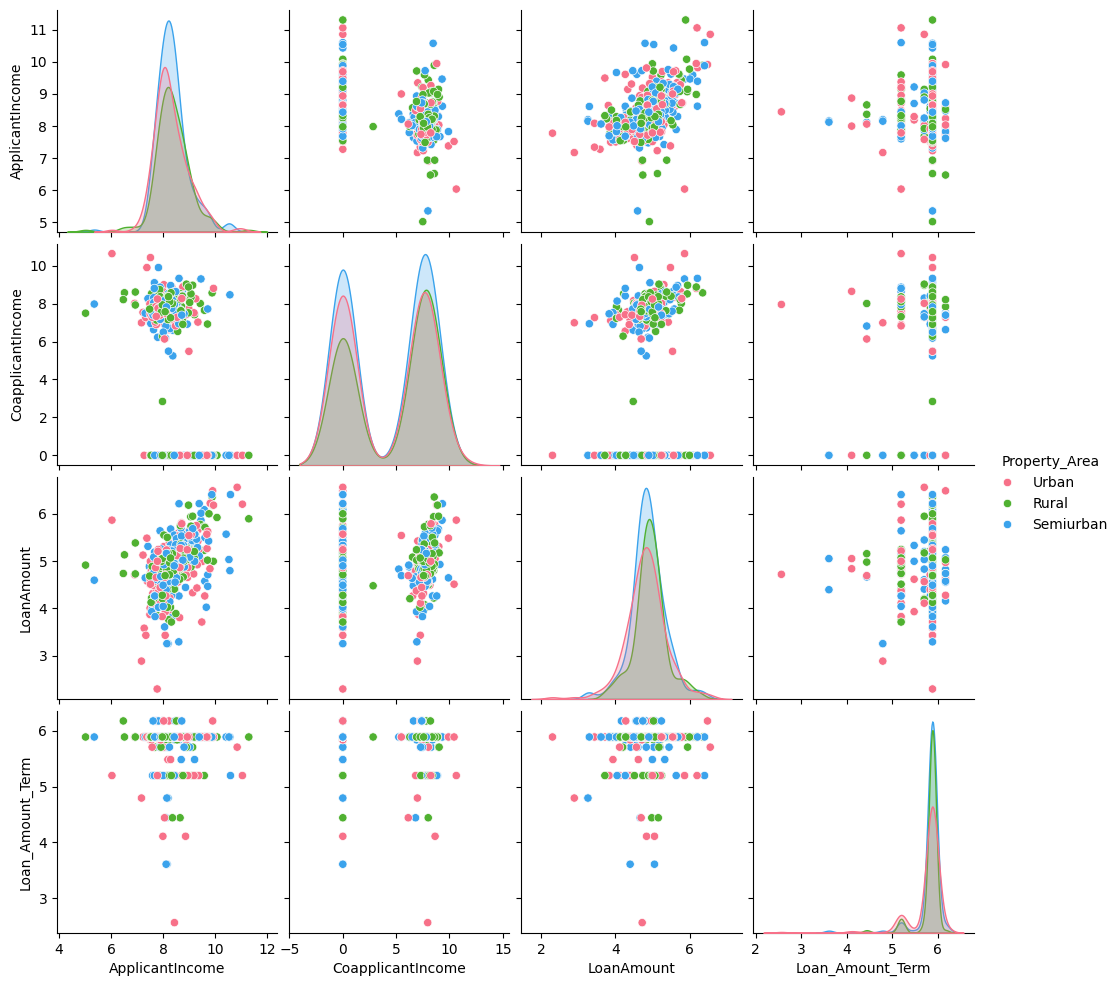

In [16]:
sb.pairplot(df, vars=["ApplicantIncome", 'CoapplicantIncome','LoanAmount','Loan_Amount_Term'],hue='Property_Area',palette="husl")
plt.show()

In [17]:
numerical_feature = df.select_dtypes(include=['float','int']).columns
df[numerical_feature].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.368258,0.492560,-0.014723,0.017783
CoapplicantIncome,-0.368258,1.000000,0.130524,0.012895,0.003862
LoanAmount,0.492560,0.130524,1.000000,0.084301,-0.023517
Loan_Amount_Term,-0.014723,0.012895,0.084301,1.000000,-0.008921
Credit_History,0.017783,0.003862,-0.023517,-0.008921,1.000000


In [18]:
df = df.drop('Loan_ID',axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674197,0.000000,4.993232,5.888878,0.693147,Urban,Y
1,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,5.888878,0.693147,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,5.888878,0.693147,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,5.888878,0.693147,Urban,Y
4,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,5.888878,0.693147,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972811,0.000000,4.276666,5.888878,0.693147,Rural,Y
610,Male,Yes,3+,Graduate,No,8.320448,0.000000,3.713572,5.198497,0.693147,Rural,Y
611,Male,Yes,1,Graduate,No,8.996280,5.484797,5.537334,5.888878,0.693147,Urban,Y
612,Male,Yes,2,Graduate,No,8.933796,0.000000,5.236442,5.888878,0.693147,Urban,Y


In [19]:
# Start to change cetegarical to numerical by using dummies

df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df['Married'].replace({'Yes':1,'No':0},inplace=True)
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
df['Dependents'].replace({'0':0,'1': 1, '2': 2,'3+':3}, inplace=True)
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)
df

C:\Users\sedth\AppData\Local\Temp\ipykernel_13300\861171964.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\sedth\AppData\Local\Temp\ipykernel_13300\861171964.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\sedth\AppData\Local\Temp\ipykernel_13300\861171964.py:4: FutureWarn

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674197,0.000000,4.993232,5.888878,0.693147,Urban,1
1,1,1,1,1,0,8.430327,7.319202,4.859812,5.888878,0.693147,Rural,0
2,1,1,0,1,1,8.006701,0.000000,4.204693,5.888878,0.693147,Urban,1
3,1,1,0,0,0,7.857094,7.765993,4.795791,5.888878,0.693147,Urban,1
4,1,0,0,1,0,8.699681,0.000000,4.955827,5.888878,0.693147,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,7.972811,0.000000,4.276666,5.888878,0.693147,Rural,1
610,1,1,3,1,0,8.320448,0.000000,3.713572,5.198497,0.693147,Rural,1
611,1,1,1,1,0,8.996280,5.484797,5.537334,5.888878,0.693147,Urban,1
612,1,1,2,1,0,8.933796,0.000000,5.236442,5.888878,0.693147,Urban,1


In [20]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [21]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [22]:
dummies = pd.get_dummies(df.Property_Area).astype(int)

df = pd.concat([df,dummies],axis='columns')

df = df.drop('Property_Area',axis=1)

In [23]:
df['Loan_Status'] = df.pop('Loan_Status')
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban,Loan_Status
0,1,0,0,1,0,8.674197,0.000000,4.993232,5.888878,0.693147,0,0,1,1
1,1,1,1,1,0,8.430327,7.319202,4.859812,5.888878,0.693147,1,0,0,0
2,1,1,0,1,1,8.006701,0.000000,4.204693,5.888878,0.693147,0,0,1,1
3,1,1,0,0,0,7.857094,7.765993,4.795791,5.888878,0.693147,0,0,1,1
4,1,0,0,1,0,8.699681,0.000000,4.955827,5.888878,0.693147,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,7.972811,0.000000,4.276666,5.888878,0.693147,1,0,0,1
610,1,1,3,1,0,8.320448,0.000000,3.713572,5.198497,0.693147,1,0,0,1
611,1,1,1,1,0,8.996280,5.484797,5.537334,5.888878,0.693147,0,0,1,1
612,1,1,2,1,0,8.933796,0.000000,5.236442,5.888878,0.693147,0,0,1,1


In [24]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Rural                  int32
Semiurban              int32
Urban                  int32
Loan_Status            int64
dtype: object

In [25]:
df.shape

(614, 14)

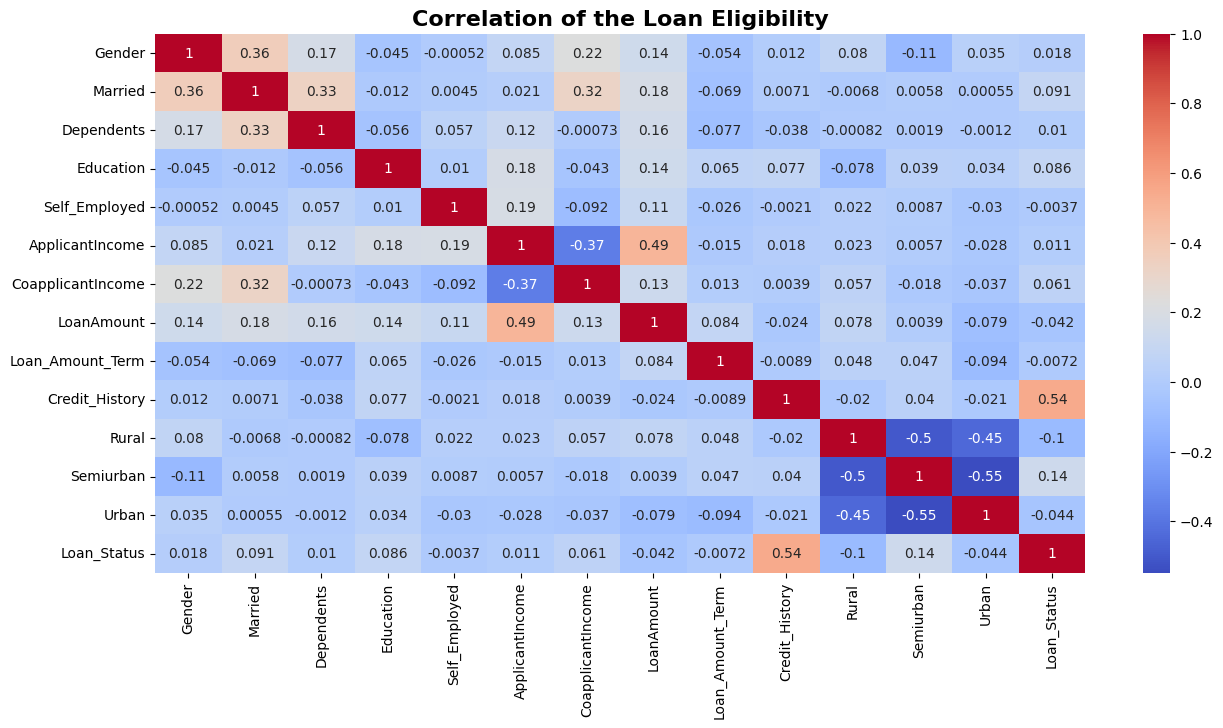

In [26]:
plt.figure(figsize=(15,7))
sb.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('Correlation of the Loan Eligibility', fontweight='bold', size=16)
plt.show()

In [27]:
corr_loan = df.corr()
corr_loan['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.541268
Semiurban            0.136540
Married              0.091478
Education            0.085884
CoapplicantIncome    0.060593
Gender               0.017987
ApplicantIncome      0.010959
Dependents           0.010118
Self_Employed       -0.003700
Loan_Amount_Term    -0.007232
LoanAmount          -0.042131
Urban               -0.043621
Rural               -0.100694
Name: Loan_Status, dtype: float64

# Create model by using Neural Network

In [28]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)


In [31]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
553,1,1,0,0,0,7.805882,7.755339,5.204007,5.888878,0.000000,0,0,1
601,1,1,0,0,0,7.970740,7.934872,5.049856,5.888878,0.693147,1,0,0
261,1,0,0,1,0,7.630947,7.700748,4.905275,5.888878,0.693147,0,1,0
496,1,1,0,0,0,7.863651,7.438972,4.682131,5.888878,0.693147,1,0,0
529,1,0,0,0,0,8.822322,0.000000,4.875197,5.888878,0.693147,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,0,1,7.536897,7.536897,4.584967,5.888878,0.693147,0,1,0
106,1,1,2,1,0,9.342946,7.027315,5.420535,5.888878,0.693147,0,0,1
270,0,0,0,1,0,8.082711,0.000000,3.433987,5.888878,0.693147,0,0,1
435,0,1,0,1,0,9.215129,0.000000,4.993232,5.484797,0.693147,0,1,0


In [45]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(13,), activation='relu'),
    # Dropout(0.5),
    keras.layers.Dense(7, activation='sigmoid'),
    # Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=300)
# Evaluate the model on the train set
train_loss, train_accuracy = model.evaluate(X_train, y_train)

# Evaluate the best model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/300


d:\Self_Program\D_Program\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2776 - loss: 1.0431   
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3132 - loss: 0.9171 
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2692 - loss: 0.8839 
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3153 - loss: 0.8044 
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3171 - loss: 0.7652 
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3023 - loss: 0.7354 
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3579 - loss: 0.7043 
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6541 - loss: 0.6837 
Epoch 9/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6954 - loss: 0.6657 
Epoch 10/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6939 - loss: 0.6556 
Epoch 11/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6947 - loss: 0.6431 
Epoch 12/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [46]:
y_pred = model.predict(X_test)
y_pred[:10]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[0.8350931 ],
       [0.81597453],
       [0.85207593],
       [0.75638807],
       [0.8268959 ],
       [0.8435361 ],
       [0.8839169 ],
       [0.8206716 ],
       [0.83726794],
       [0.8662774 ]], dtype=float32)

In [47]:
y_test[:10] 

350    1
377    1
163    1
609    1
132    1
578    1
316    1
2      1
340    0
77     0
Name: Loan_Status, dtype: int64

In [48]:
y_preds = []
for element in y_pred:
    if element > 0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)
y_preds[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [49]:
confusion_matrix(y_test,y_preds)

array([[ 27,  38],
       [  2, 118]], dtype=int64)

In [50]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



Text(33.22222222222222, 0.5, 'Truth')

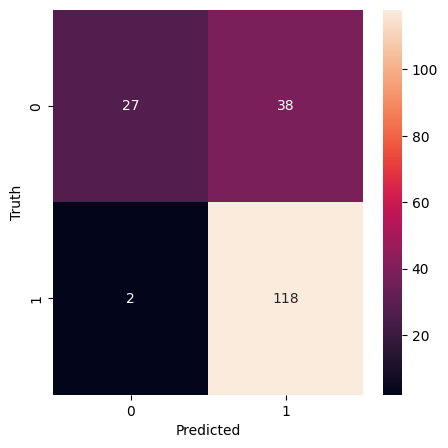

In [51]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds)

plt.figure(figsize=(5, 5))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [52]:
# import pickle

In [53]:
# with open('medel_pickle','wb') as f:
#     pickle.dump(model,f)

In [54]:
# with open('medel_pickle','rb') as f:
#     md = pickle.load(f)